In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC


In [8]:

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/mini/archive (10)/Tweets.csv')

# Preprocessing
data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.date

# Drop irrelevant columns
data.drop(columns=['tweet_coord', 'airline_sentiment_gold', 'negativereason_gold'], inplace=True)

# Drop rows with neutral sentiment
#data.drop(data[data['airline_sentiment'] == 'neutral'].index, inplace=True)



In [9]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
'''le = LabelEncoder()
data['airline_sentiment_encoded'] = le.fit_transform(data['airline_sentiment'])
'''

"le = LabelEncoder()\ndata['airline_sentiment_encoded'] = le.fit_transform(data['airline_sentiment'])\n"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-10-027f5049a49b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['airline_sentiment'], order=data['airline_sentiment'].value_counts().index, palette='Set2')


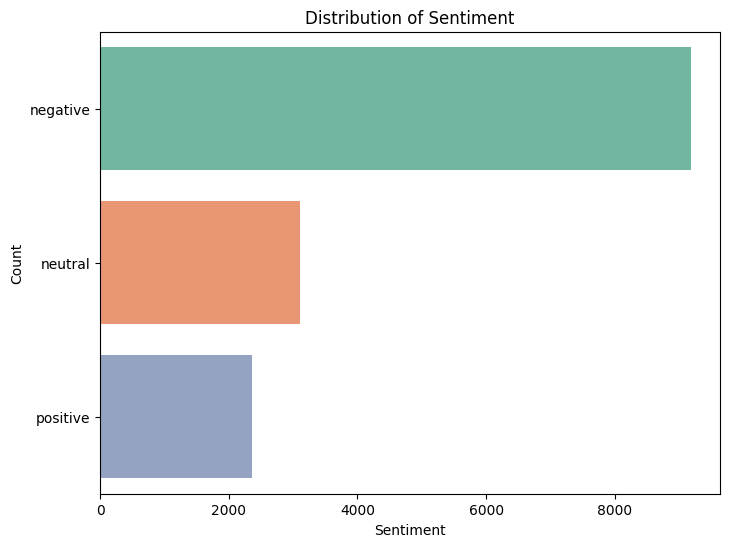

In [10]:

# Text preprocessing function
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ", tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return " ".join(meaningful_words)

# Apply text preprocessing
nltk.download('stopwords')
data['clean_tweet'] = data['text'].apply(lambda x: tweet_to_words(x))

# Distribution of Sentiment
plt.figure(figsize=(8, 6))
sns.countplot(data['airline_sentiment'], order=data['airline_sentiment'].value_counts().index, palette='Set2')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [11]:

# Splitting the data
x = data['clean_tweet']
y = data['airline_sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Vectorization
vect = CountVectorizer()
vect.fit(x_train)
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

# Model building
model = SVC(kernel='linear', random_state=10)
model.fit(x_train_dtm, y_train)
pred = model.predict(x_test_dtm)

# Evaluation
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)



Accuracy: 0.7793715846994536


In [12]:
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:\n", classification_report(y_test, pred))




Confusion Matrix:
 [[1623  200   66]
 [ 196  330   54]
 [  77   53  329]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.86      0.86      1889
     neutral       0.57      0.57      0.57       580
    positive       0.73      0.72      0.72       459

    accuracy                           0.78      2928
   macro avg       0.72      0.71      0.72      2928
weighted avg       0.78      0.78      0.78      2928



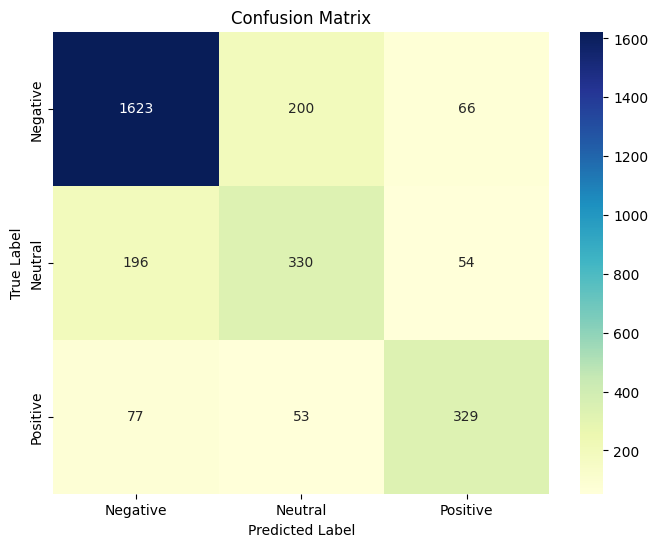

In [14]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Negative','Neutral', 'Positive'], columns=['Negative','Neutral', 'Positive'])
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\n\n\n\n\n\n\n\n")


In [17]:

# Feature importance
feature_names = vect.get_feature_names_out()
coef = model.coef_.toarray()[0]
top_positive_coefficients = sorted(zip(coef, feature_names), reverse=True)[:10]
top_negative_coefficients = sorted(zip(coef, feature_names))[:10]



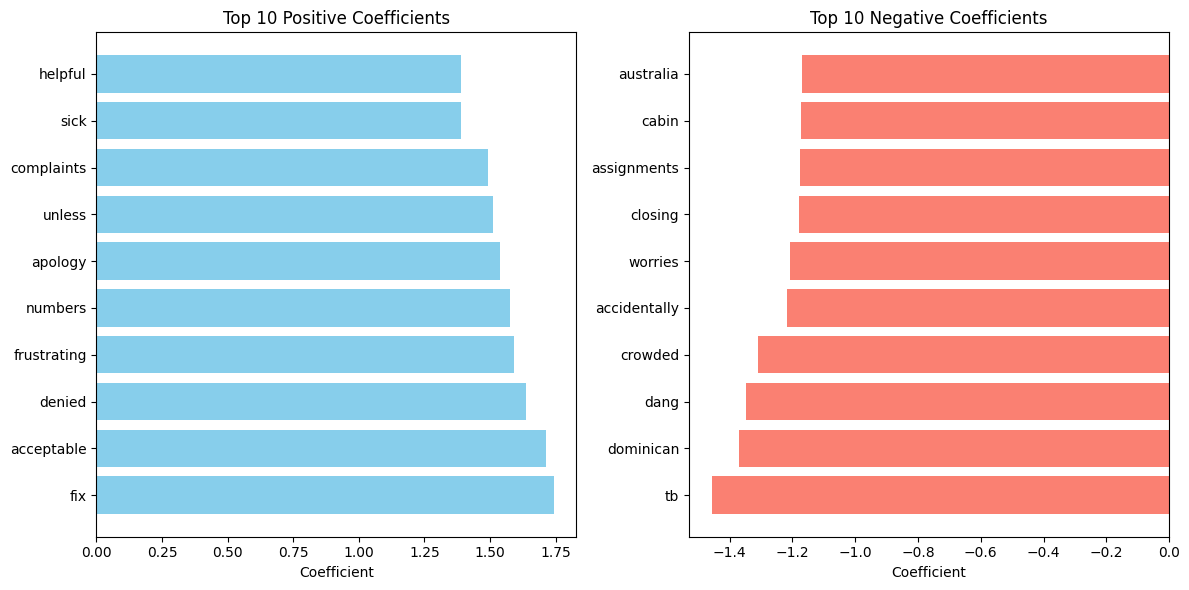

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.barh([x[1] for x in top_positive_coefficients], [x[0] for x in top_positive_coefficients], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Top 10 Positive Coefficients')
plt.subplot(122)
plt.barh([x[1] for x in top_negative_coefficients], [x[0] for x in top_negative_coefficients], color='salmon')
plt.xlabel('Coefficient')
plt.title('Top 10 Negative Coefficients')
plt.tight_layout()
plt.show()
print("\n\n\n\n\n\n\n\n")